# Сборный проект. Анализ и предсказание продаж игр на различных платформах.

Интернет-магазин, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**

 - `Name` — название игры
 - `Platform` — платформа
 - `Year_of_Release` — год выпуска
 - `Genre` — жанр игры
 - `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
 - `EU_sales` — продажи в Европе (миллионы проданных копий)
 - `JP_sales` — продажи в Японии (миллионы проданных копий)
 - `Other_sales` — продажи в других странах (миллионы проданных копий)
 - `Critic_Score` — оценка критиков (максимум 100)
 - `User_Score` — оценка пользователей (максимум 10)
 - `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 1 Общая информация о датасете

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data[data['User_Score'] == 'tbd']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Посмотрим на строки с пропущенными значениями

In [6]:
data[data['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
data[data['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
data[data['Genre'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
data[data['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
data[data['User_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
data[data['Rating'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


На данном этапе можем сделать следующие выводы:

 - пропущенные значения в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`
 - категориальные переменные `Name`, `Platform`, `Genre`, `Rating`
 - количественные переменные `Year_of_release`, `NA_sales`, `EU_sales`, `JP_sales`, `Other_sales`, `Critic_Score`, `User_Score`
 - в строчках 659 и 14244 пустые значения по столбцам `Name` и `Genre`, причем отличаются они продажами по Японии. Скорее всего это одна и та же запись.


## Предподготовка данных

### Приведение названия столбцов к нижнему регистру

In [12]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Замена типов данных в столбцах датафрейма

Преобразование типов данных в столбцах
 - `na_sales`, `eu_sales`, `jp_sales`, `other_sales` - исказит точность продаж в млн копий
 - `critic_score`, `user_score` - не получится из-за наличия пропущенных значений Nan
 - `year_of_release` - преобразуем в тип данных datetime
 - `name`, `platform`, `genre` - в строковые значения

In [13]:
data['year_of_release'] = pd.to_numeric(data['year_of_release'], downcast='integer')
data['critic_score'] = pd.to_numeric(data['critic_score'], downcast='integer')
data['name'] = data['name'].astype('str')
data['platform'] = data['platform'].astype('str')
data['genre'] = data['genre'].astype('str')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Заполнение пропусков в значениях

 - `name`, `genre` - пропуски в строках 659 и 14244 стоит удалить 
 - `rating` - возрастной рейтинг можно заполнить по значениям самых популярных рейтингов в зависимости от жанра
 - `critic_score`, `user_score` - заполнить не получится, так как для каждой конкретной игры рейтинг составляется индивидуально. `Пропуски в данных столбцах появляются из-за того, что оценка игр происходит не сразу, причем некоторые игры могут быть вообще не оценены. Из-за этого в большинстве случаев и отсутствуют оценки.`
 - изучим значение `tbd` в столбце `user_score` подробнее
 
### Удаление строк

In [14]:
data.drop([659, 14244], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [15]:
data[data['year_of_release'].isna()]['name'].unique()

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

In [16]:
len(data[data['year_of_release'].isna()]['name'].unique())

232

**Восстановим данные**

 - `year_of_release` - например для спортивных игр FIFA 15 - этот год означает конец сезона 14/15, соответственно выход игры должен был состояться в 2014. 
 - `rating` - заполним пропущенные значения `unknown`
 
### Восстановление значений в year_of_release

In [17]:
def fill_year(row):
    year = 0
    last_word = ''
    genre = row[3]
    for word in row[0].split():
        try:
            last_word = word
            year = int(word)
        except:
            continue
    if genre in ('Sports', 'Racing', 'Fighting'):
        if year > 2000 or last_word in ('2K6','2K8'):
            if genre == 'Sports':
                year -=1
            if last_word == '2K6':
                year = 2005
            elif last_word == '2K8':
                year = 2007
            if year < 2017 and np.isnan(row[2]):
                row[2] = year
    return row

data = data.apply(fill_year, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16462 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [18]:
len(data[data['year_of_release'].isna()]['name'].unique())

217

### Восстановление значений в rating

In [19]:
data['rating'].fillna('unknown', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16462 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### Значение tbd

In [20]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


`tbd` - значение расшифровывается как `to be determined` или `to be decided` то есть "будет определено" или "будет решено". Оно используется, когда конкретное значение или информация ещё не известны или не были приняты окончательные решения.

То есть на момент выгрузки датасета значения рейтинга пользователей еще не были собраны.

Обработаем эти значения на значения Nan, чтобы он содержал один тип данных.


In [21]:
data['user_score'] = data['user_score'].replace({'tbd': pd.NA}, regex=False)
data['user_score'] = pd.to_numeric(data['user_score'], downcast='float', errors ='coerce')
data['user_score'] = data['user_score'].round(1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16462 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float32
 10  rating           16713 non-null  object 
dtypes: float32(1), float64(6), object(4)
memory usage: 1.5+ MB


### Расчет суммарных продаж по всем регионам

In [22]:
data['world_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


### Выводы

**На данном этапе было сделано**

 - привели к нижнему регистру газвания столбцов
 - восстановили пропущенные значения в столбцах `year_of_release` и `rating`
 - обработали выбивающиеся значения `tbd` в столбце `user_score`
 - расчитали суммарные продажи по всем регионам
 
Данные готовы к дальнейшему анализу

## Исследовательский анализ данных

### Выпуск игр по годам

In [23]:
pivot_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
pivot_year.columns = ['count_of_games']
pivot_year

,count_of_games
year_of_release,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


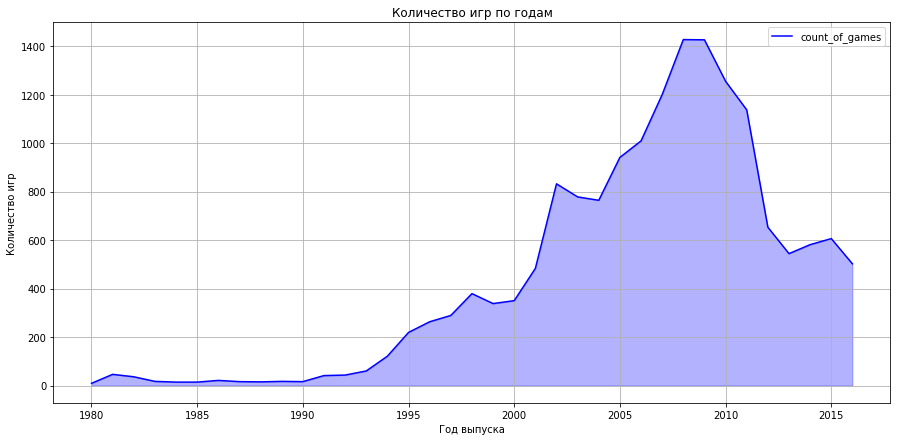

In [24]:
pivot_year.plot(color='blue', figsize=(15, 7), grid=True)
plt.fill_between(pivot_year.index, pivot_year['count_of_games'], color='blue', alpha=0.3)
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Количество игр по годам')
plt.show()

Пик приходится на период с 2005 по 2010 годы.

Количество изданных игр до 1995 года значительно меньше, чем за последующее время. Очевидно, с 1995 года появмлся стремительный рост игровой индустрии.

Не все данные важны, так как охватываемый период затрагивает промежуток времени в 35 лет. За этот период произошло много изменений в сфере тезнологий, что в свою очередь повлияло и на игровую индустрию. Так например:

 - `1980 - 1993` было в принципе мало продаж игр в силу недостаточного уровня развития игровых движков, соответственно, и отзывов критиков и пользователей за этот период значительно меньше;
 - `2002` произошел пик, на этот период пришелся прогресс игровых движков;
 - `2005-2010` пришла популярность на игры и их массовое распространение;
 - `2012 - 2016` спад обусловлен кризисом, а также тем, что игровые студии стали создавать более сложные продукты, на разработку которых тратится больше времени.
 
### Продажи по платформам

In [25]:
pivot_sales = data.pivot_table(index='platform', values='world_sales', aggfunc='sum')
pivot_sales = pivot_sales.sort_values('world_sales', ascending=False)
pivot_sales

,world_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Больше всего продаж для платформ `PS2`, `X360`, `PS3`, `Wii`, `DS`. Изучим распределение продаж по годам.

In [26]:
top_platforms = list(pivot_sales.index[:6])
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Платформа PS2
                 world_sales
year_of_release             
2000.0                 39.17
2001.0                166.43
2002.0                205.78
2003.0                194.27
2004.0                212.13
2005.0                160.91
2006.0                106.46
2007.0                 75.99
2008.0                 53.90
2009.0                 26.40
2010.0                  5.64
2011.0                  0.45 

Платформа X360
                 world_sales
year_of_release             
2005.0                  8.25
2006.0                 51.63
2007.0                 95.41
2008.0                135.26
2009.0                120.29
2010.0                170.03
2011.0                143.89
2012.0                 99.74
2013.0                 88.58
2014.0                 34.74
2015.0                 11.96
2016.0                  1.52 

Платформа PS3
                 world_sales
year_of_release             
2006.0                 20.96
2007.0                 73.19
2008.0                118

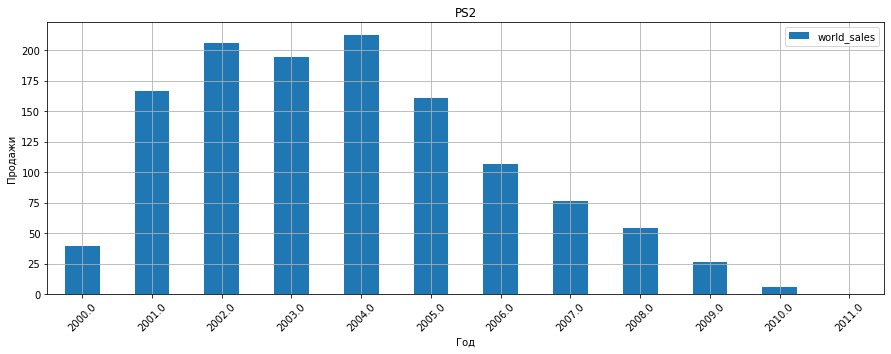

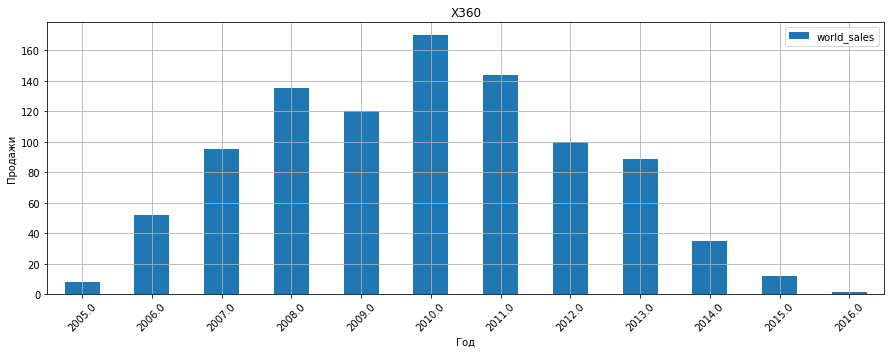

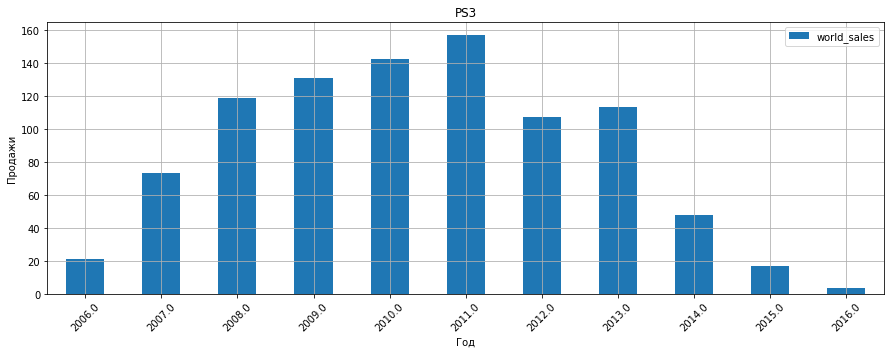

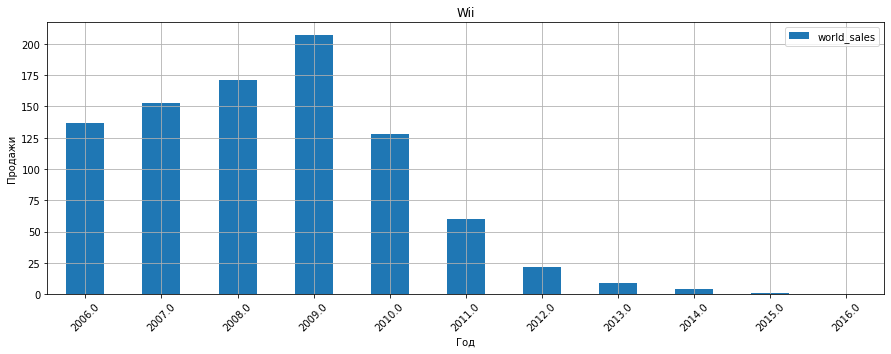

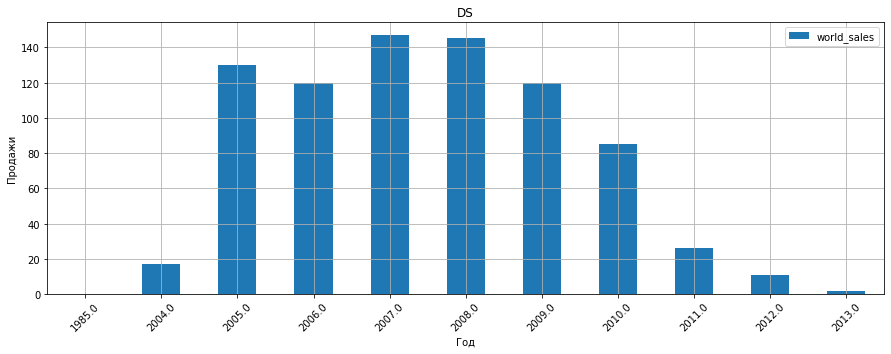

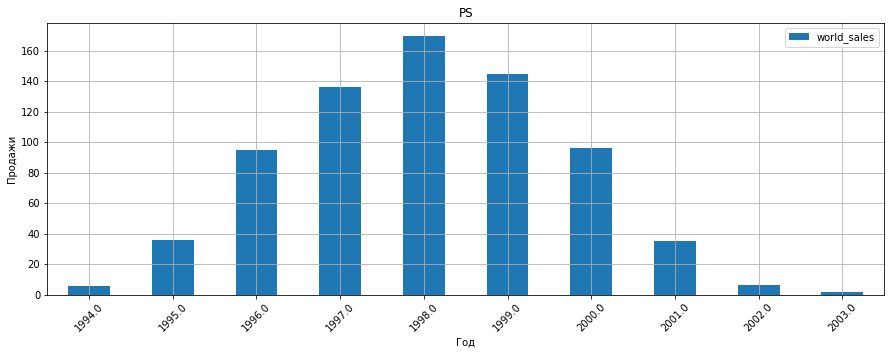

In [27]:
for col in top_platforms:
    local_data = data[data['platform'] == col]
    local_pivot = local_data.pivot_table(index='year_of_release', values='world_sales', aggfunc='sum')
    local_pivot.plot(kind='bar', figsize=(15, 5), grid=True)
    plt.title(col)
    plt.xlabel('Год')
    plt.xticks(rotation=45)
    plt.ylabel('Продажи')
    print('Платформа', col)
    print(local_pivot, '\n')


Посмотрим такоеже распределение для платформы `PS4`

Платформа PS4
                 world_sales
year_of_release             
2013.0                 25.99
2014.0                100.00
2015.0                118.90
2016.0                 69.25


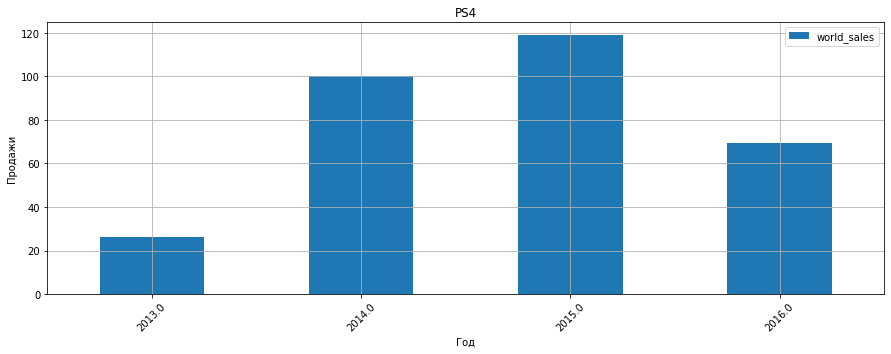

In [28]:
local_data = data[data['platform'] == 'PS4']
local_pivot = local_data.pivot_table(index='year_of_release', values='world_sales', aggfunc='sum')
local_pivot.plot(kind='bar', figsize=(15, 5), grid=True)
plt.title('PS4')
plt.xlabel('Год')
plt.xticks(rotation=45)
plt.ylabel('Продажи')
print('Платформа PS4')
print(local_pivot)

На примере платформы `PlayStation` можно проследить определенный тренд, что "время жизни" платформы в районе 10 лет (8-12 лет).

 - `PS` 1994-2003 
 - `PS2` 2000-2010
 - `PS3` 2006-2016
 - `PS4` 2013 - настоящее время. Скорее всего уйдет с продажи в ближайший год, т.к. в ноябре 2020 года была выпущена `PS5`
 
Примерно каждые 6 лет, компания Sony выпускает новую модель, а предыдущая уходит с продажи примерно за 3 года после выпуска новой.

### Актуальный период

Актуальный период продаж стоит считать 2013-2016 года (они своевремнно отображают данные об индустрии)

`Платформа PS4 дает возможность поддержки новых игр, которые имеют более высокие технические требования.
К тому же разработка игр сместилась в сторону качества, а не количества игр, то есть игры создаются за период 2-4 года и если выход PS4 приходится на 2013, то к 2017 году есть основания ожидать пик продаж.`


### Отсев предыдущих периодов


In [29]:
actual_data = data.query('year_of_release > 2012')
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   float64
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float32
 10  rating           2233 non-null   object 
 11  world_sales      2233 non-null   float64
dtypes: float32(1), float64(7), object(4)
memory usage: 218.1+ KB


Создадим сводную таблицу по прадаж с платформ за актуальный период.

In [30]:
actual_pivot = actual_data.pivot_table(index=['platform', 'year_of_release'], values='world_sales', aggfunc='sum')
actual_pivot

world_sales
platform year_of_release             
3DS      2013.0                 56.57
         2014.0                 43.76
         2015.0                 27.78
         2016.0                 15.14
DS       2013.0                  1.54
PC       2013.0                 12.38
         2014.0                 13.28
         2015.0                  8.52
         2016.0                  5.25
PS3      2013.0                113.25
         2014.0                 47.76
         2015.0                 16.82
         2016.0                  3.60
PS4      2013.0                 25.99
         2014.0                100.00
         2015.0                118.90
         2016.0                 69.25
PSP      2013.0                  3.14
         2014.0                  0.24
         2015.0                  0.12
PSV      2013.0                 10.59
         2014.0                 11.90
         2015.0                  6.25
         2016.0                  4.25
Wii      2013.0                  8.59
         2014.0                  3.75
         2015.0                  1.14
         2016.0                  0.18
WiiU     2013.0                 21.65
         2014.0                 22.03
         2015.0                 16.35
         2016.0                  4.60
X360     2013.0                 88.58
         2014.0                 34.74
         2015.0                 11.96
         2016.0                  1.52
XOne     2013.0                 18.96
         2014.0                 54.07
         2015.0                 60.14
         2016.0                 26.15

Рост продаж наблюдается у PS4, XOne, 3DS, WiiU и PSV. Этому способствует то, что данные платформы обновляются. В свою очередь на убыль идут компании PS3, X360, DS, Wii и PSP - устаревшие поколения

In [31]:
top_actual_pivot = actual_data.pivot_table(index='platform', values='world_sales', aggfunc='sum')
top_actual_pivot.sort_values('world_sales', ascending=False)

,world_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Самые популярные платформы по продажам игр за актуальный период:

 - `PS4` - 314 млн копий
 - `PS3` - 181 млн копий
 - `XOne`- 159 млн копий
 - `3D S`- 143 млн копий
 - `X360`- 136 млн копий
 
### Глобальные продажи игр в разбивке по годам

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: world_sales, dtype: float64

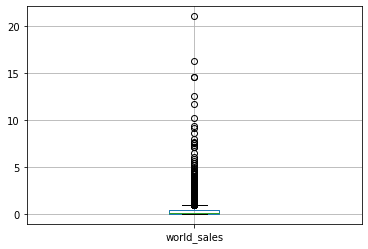

In [32]:
actual_data.boxplot(column='world_sales');
actual_data['world_sales'].describe()

In [33]:
best_platforms = list(top_actual_pivot.sort_values('world_sales', ascending=False).index)
best_platforms = best_platforms[0:5]
best_platforms

['PS4', 'PS3', 'XOne', '3DS', 'X360']

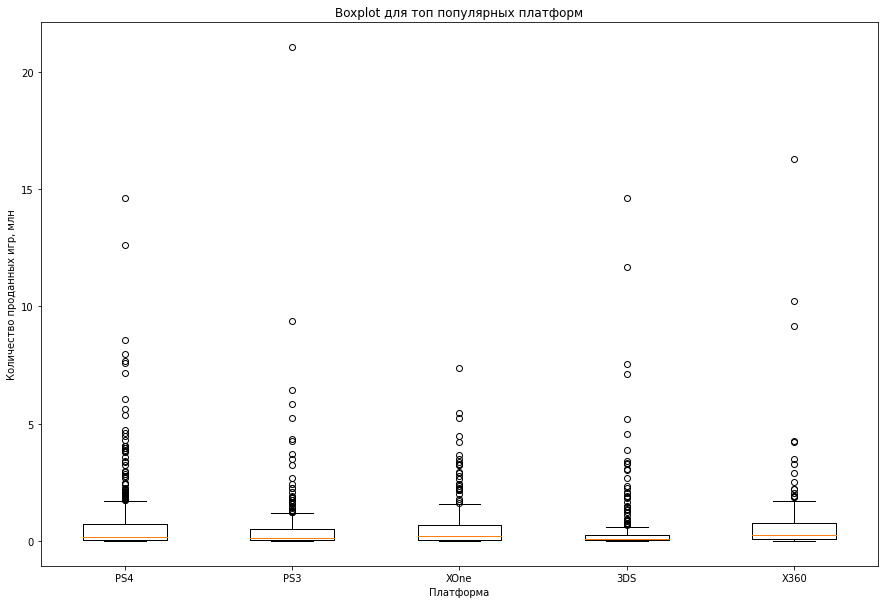

In [34]:
group_data = {}
for group in best_platforms:
    group_data[group] = actual_data[actual_data['platform'] == group]['world_sales']

# Построение boxplot для каждой группы
plt.figure(figsize=(15, 10));
plt.boxplot(group_data.values(), labels=group_data.keys());
plt.title('Boxplot для топ популярных платформ');
plt.xlabel('Платформа');
plt.ylabel('Количество проданных игр, млн');
plt.show();

In [35]:
actual_data[actual_data['world_sales'] > 10]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
60,Call of Duty: Ghosts,X360,2013.0,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24


В продажах наблюдаются различия между играми, которые становятся очень популярными и продаются в течении многих лет, видно, что таких игр мало. А также те игры, что сконцентрированы между 200 и 400 тысячами проданных копий.

 - `общее` среднее значение проданных копий по миру - 488 тысяч, наибольшее 21 млн. Наименьшее 10 тысяч
 - `PS4` среднее значение проданных копий для платформы - 200 тысяч, наибольшее 14 млн. Наименьшее 10 тысяч
 - `PS3` среднее значение проданных копий для платформы - 525 тысяч, наибольшее 21 млн. Наименьшее 10 тысяч
 - `XOne` среднее значение проданных копий для платформы - 645 тысяч, наибольшее 7.4 млн. Наименьшее 10 тысяч
 - `X360` среднее значение проданных копий для платформы - 735 тысяч, наибольшее 16.3 млн. Наименьшее 10 тысяч
 - `3DS` среднее значение проданных копий для платформы - 645 тысяч, наибольшее 7.4 млн. Наименьшее 10 тысяч
 
Для платформ `PS4`, `PS3`, `X360` особенно заметными выбросами являются игры `GTA V` и `Call of Duty`, Что вполне ожидаемо для этих игр. В свою очередь для японской платформы `3DS` очень популярной является игра `Pokemon`.  

### Продажи на популярных платформах

In [36]:
ps4_actual_data = actual_data.query('platform =="PS4"')
ps4_rating = ps4_actual_data.loc[:,['world_sales', 'critic_score', 'user_score']]
ps4_rating.head()

,world_sales,critic_score,user_score
31,14.63,NaN,NaN
42,12.62,97.0,8.3
77,8.58,82.0,4.3
87,7.98,NaN,NaN
92,7.66,83.0,5.7


In [37]:
ps4_rating.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


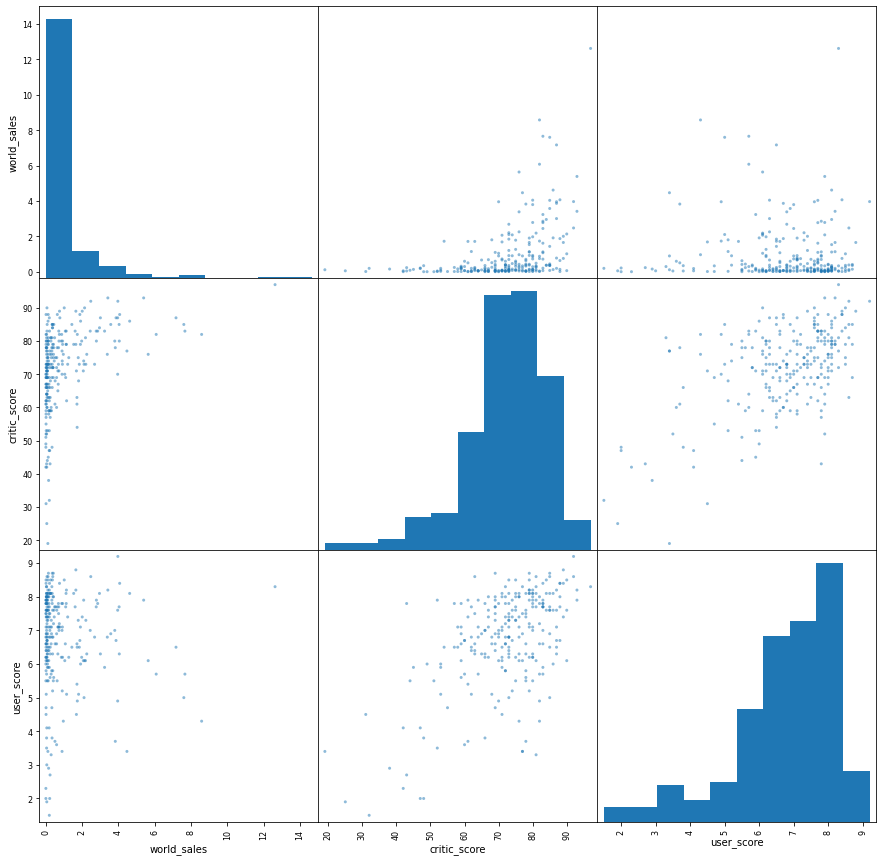

In [38]:
pd.plotting.scatter_matrix(ps4_rating, figsize=(15, 15));

Для платформы `PS4` существует умеренная положительная корреляция между количеством проданных копий и рейтингом критиков.

Так же существует зависимость между рейтингом критиков и рейтингом пользователей. Условно говоря, чем выше рейтинг поставленный критиком, тем выше рейтинг поставленный пользователями.

In [39]:
ps3_actual_data = actual_data.query('platform =="PS3"')
ps3_rating = ps3_actual_data.loc[:,['world_sales', 'critic_score', 'user_score']]
ps3_rating.head()

,world_sales,critic_score,user_score
16,21.05,97.0,8.2
69,9.36,71.0,2.6
126,6.46,86.0,4.3
149,5.86,95.0,9.1
180,5.27,NaN,NaN


In [40]:
ps3_rating.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.334285,0.002394
critic_score,0.334285,1.000000,0.599920
user_score,0.002394,0.599920,1.000000


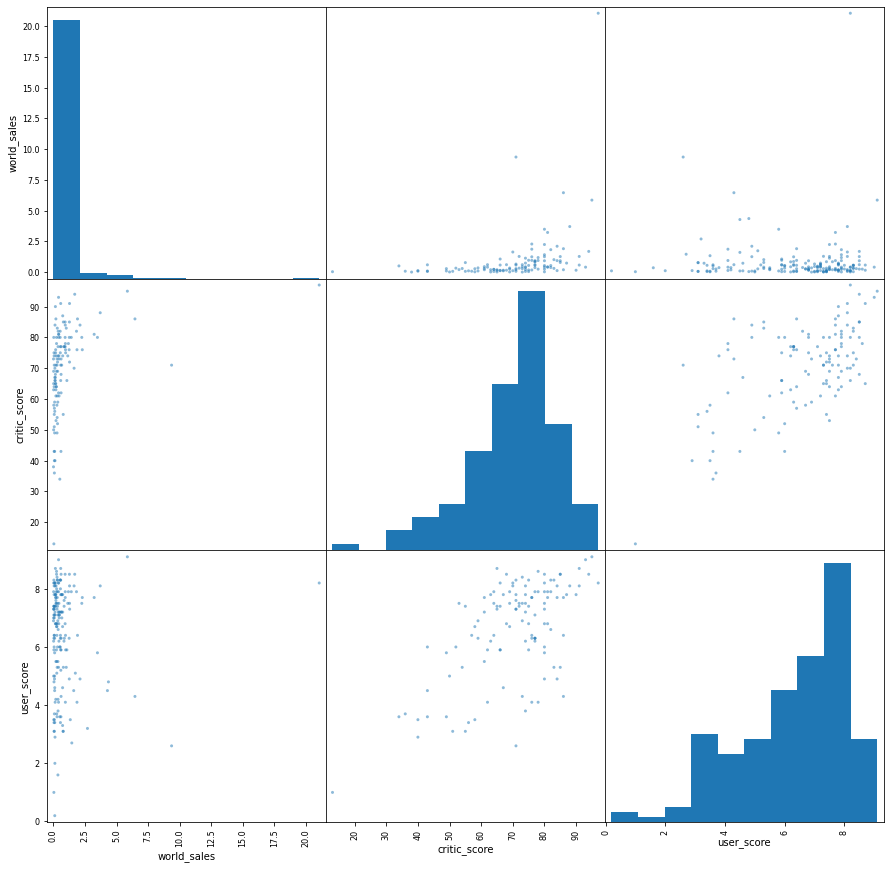

In [41]:
pd.plotting.scatter_matrix(ps3_rating, figsize=(15, 15));

Для платформы PS3 взаимосвязь показателей аналогична PS4

In [42]:
x_one_actual_data = actual_data.query('platform =="XOne"')
x_one_rating = x_one_actual_data.loc[:,['world_sales', 'critic_score', 'user_score']]
x_one_rating.head()

,world_sales,critic_score,user_score
99,7.39,NaN,NaN
165,5.47,97.0,7.9
179,5.26,81.0,5.4
242,4.49,84.0,6.4
270,4.22,88.0,6.2


In [43]:
x_one_rating.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


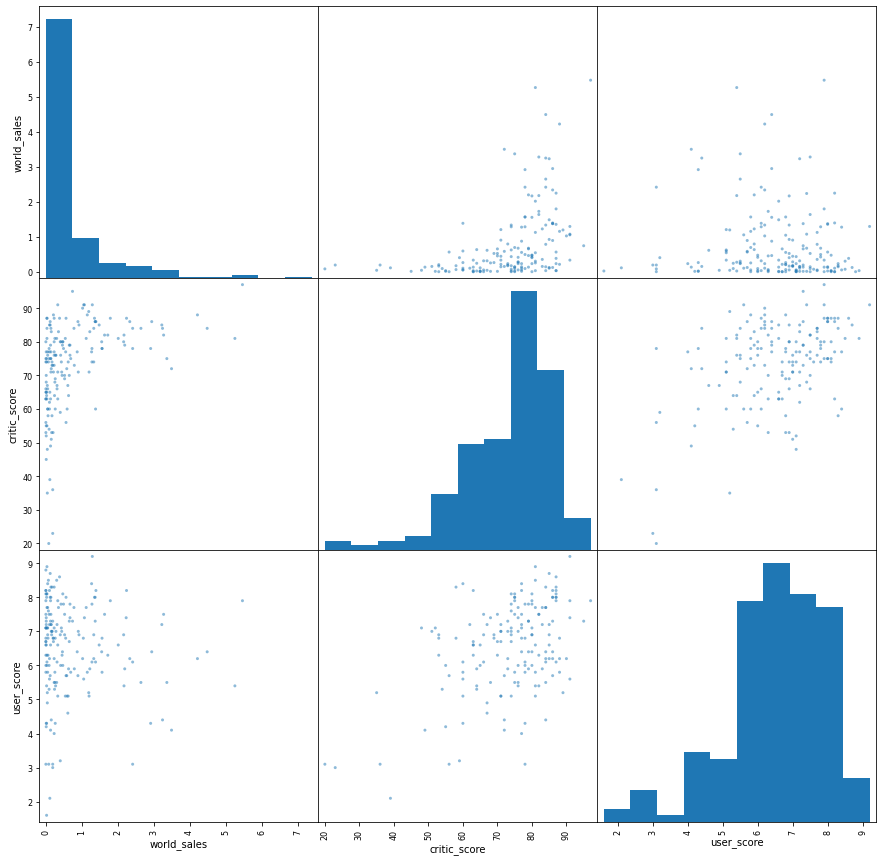

In [44]:
pd.plotting.scatter_matrix(x_one_rating, figsize=(15, 15));

In [45]:
x_360_actual_data = actual_data.query('platform =="X360"')
x_360_rating = x_360_actual_data.loc[:,['world_sales', 'critic_score', 'user_score']]
x_360_rating.head()

,world_sales,critic_score,user_score
23,16.27,97.0,8.1
60,10.24,73.0,2.6
72,9.18,NaN,NaN
263,4.28,NaN,4.9
271,4.22,84.0,4.2


In [46]:
x_360_rating.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.350345,-0.011742
critic_score,0.350345,1.000000,0.520946
user_score,-0.011742,0.520946,1.000000


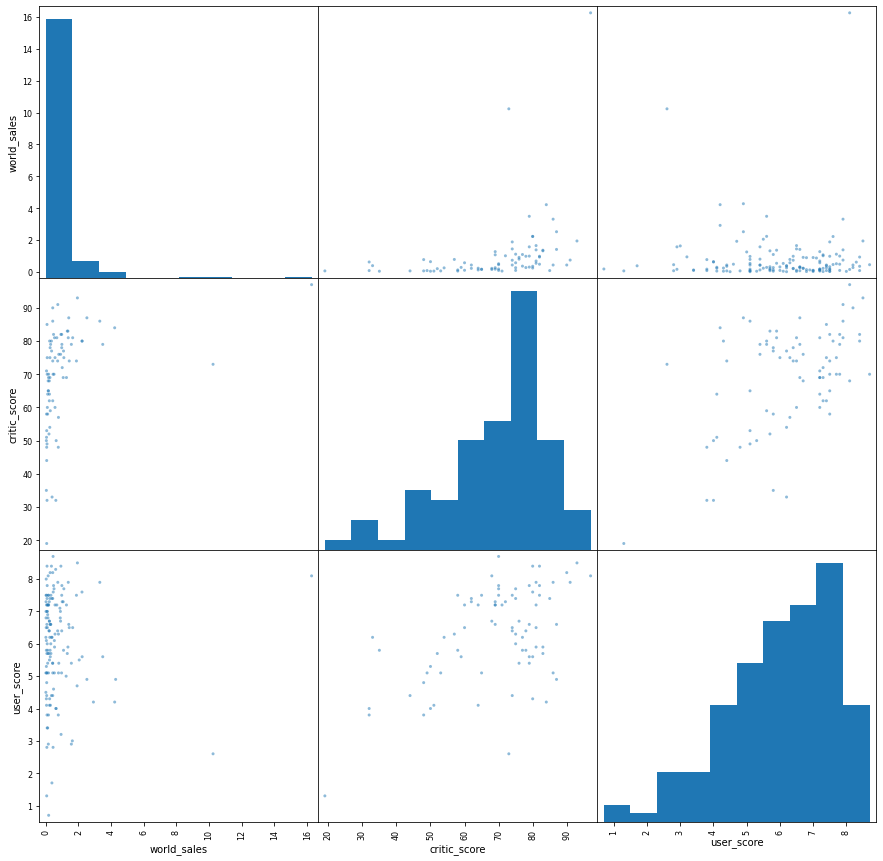

In [47]:
pd.plotting.scatter_matrix(x_360_rating, figsize=(15, 15));

In [48]:
_3ds_actual_data = actual_data.query('platform =="3DS"')
_3ds_rating = _3ds_actual_data.loc[:,['world_sales', 'critic_score', 'user_score']]
_3ds_rating.head()

,world_sales,critic_score,user_score
33,14.60,NaN,NaN
47,11.68,NaN,NaN
96,7.55,NaN,NaN
108,7.14,NaN,NaN
184,5.22,NaN,NaN


In [49]:
_3ds_rating.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


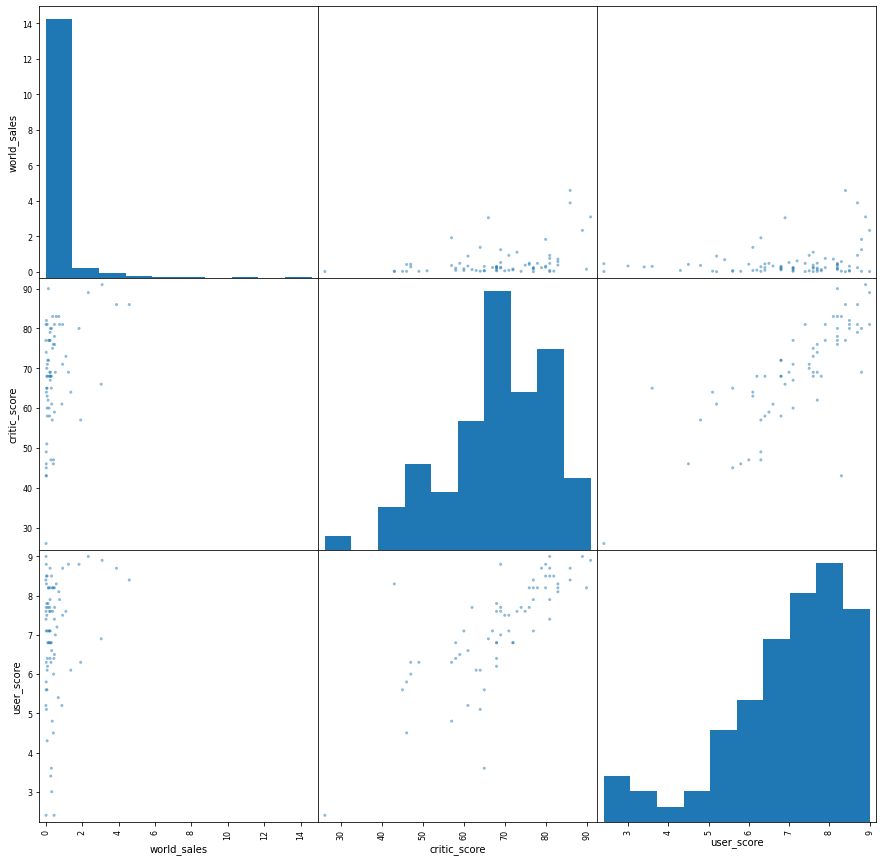

In [50]:
pd.plotting.scatter_matrix(_3ds_rating, figsize=(15, 15));

В платформах `PS3`, `XOne`, `X360` наблюдаются похожие связи как и в `PS4`

Несколько отличается `3DS`. Взаимосвязь между оценками критиков и пользователей более высокая. С количеством продаж корреляция довольно низкая.

### Распределение игр по жанрам

In [51]:
genre_pivot = actual_data.pivot_table(index='genre', values='world_sales', aggfunc='median')
genre_pivot.columns = ['median_world_sales']
genre_pivot = genre_pivot.sort_values('median_world_sales', ascending=False)
genre_pivot

,median_world_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


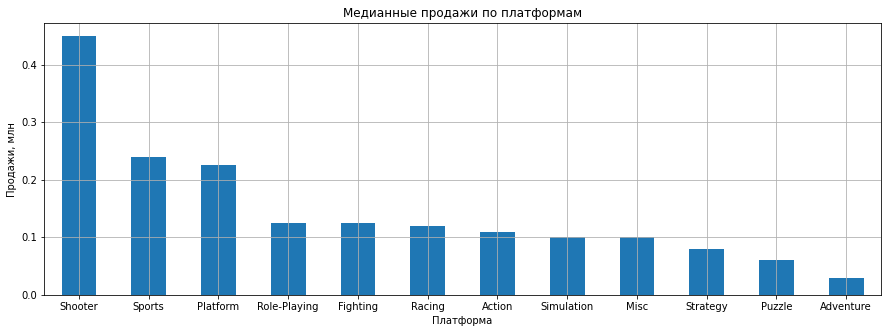

In [52]:
genre_pivot['median_world_sales'].plot(kind='bar', figsize=(15, 5), grid=True);
plt.title('Медианные продажи по платформам');
plt.xlabel('Платформа');
plt.xticks(rotation=0);
plt.ylabel('Продажи, млн');
plt.show();

Наиболее прибыльными можно считать игры жанров  `Shooter`, `Sports`, `Platform` 

 - выделяется жанр `Shooter` медианное значение превосходит второе место (`Sports`) в 1,9 раза
 - выделяется жанр `Advanture`,в котором медианное количество проданных копий на значительно ниже
 
## Составление портрета пользователя каждого региона

Необходимо определить:
 - Самые популярные платформы (топ-5). Опишите различия в долях продаж
 - Самые популярные жанры (топ-5). Поясните разницу
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
 
Создадим датафреймы для каждого региона

 

In [53]:
na_actual_data = actual_data.query('na_sales > 0')
na_actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 16 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1309 non-null   object 
 1   platform         1309 non-null   object 
 2   year_of_release  1309 non-null   float64
 3   genre            1309 non-null   object 
 4   na_sales         1309 non-null   float64
 5   eu_sales         1309 non-null   float64
 6   jp_sales         1309 non-null   float64
 7   other_sales      1309 non-null   float64
 8   critic_score     809 non-null    float64
 9   user_score       974 non-null    float32
 10  rating           1309 non-null   object 
 11  world_sales      1309 non-null   float64
dtypes: float32(1), float64(7), object(4)
memory usage: 127.8+ KB


In [54]:
eu_actual_data = actual_data.query('eu_sales > 0')
eu_actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1422 non-null   object 
 1   platform         1422 non-null   object 
 2   year_of_release  1422 non-null   float64
 3   genre            1422 non-null   object 
 4   na_sales         1422 non-null   float64
 5   eu_sales         1422 non-null   float64
 6   jp_sales         1422 non-null   float64
 7   other_sales      1422 non-null   float64
 8   critic_score     872 non-null    float64
 9   user_score       1047 non-null   float32
 10  rating           1422 non-null   object 
 11  world_sales      1422 non-null   float64
dtypes: float32(1), float64(7), object(4)
memory usage: 138.9+ KB


In [55]:
jp_actual_data = actual_data.query('jp_sales > 0')
jp_actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1187 non-null   object 
 1   platform         1187 non-null   object 
 2   year_of_release  1187 non-null   float64
 3   genre            1187 non-null   object 
 4   na_sales         1187 non-null   float64
 5   eu_sales         1187 non-null   float64
 6   jp_sales         1187 non-null   float64
 7   other_sales      1187 non-null   float64
 8   critic_score     410 non-null    float64
 9   user_score       462 non-null    float32
 10  rating           1187 non-null   object 
 11  world_sales      1187 non-null   float64
dtypes: float32(1), float64(7), object(4)
memory usage: 115.9+ KB


In [56]:
na_pivot = na_actual_data.pivot_table(index='platform', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_pivot

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


In [57]:
eu_pivot = eu_actual_data.pivot_table(index='platform', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_pivot

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
PC,25.36
WiiU,19.85
PSV,6.10
Wii,5.93


In [58]:
jp_pivot = jp_actual_data.pivot_table(index='platform', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_pivot

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
PSP,3.29
X360,0.51
XOne,0.34
Wii,0.05


Топ платформ:

 - По Северной Америке: `PS4`, `XOne`, `X360`, `PS3` и `3DS`
 - По Европе: `PS4`, `PS3`, `XOne`, `X360` и `3DS`
 - По Японии: `3DS`, `PS3`, `PSV`, `PS4` и `WiiU`
 
Популярность той или иной компнаии определяется активностью фирмы, узнаваемостью её бренда и прочее.

Важно и место расположения компании. Так, например, в Америке имеет высокую популярность XOne, X360. В Японии компания Nintendo c двумя продуктами 3DS и WiiU. На европейском рынке преобладают общие тренды.

В Америке за лидерство борются PS4 и XOne. В европе люди выбирают наиболее популярный продукт PS4. В Японии активная конкуренция между компаниями Nintendo и Sony, причем на рынке в Японии у платформы лидерство, однако на зарубежных рынках пользоватили отдают преимущество Sony.

Популярные жанры по регионам:

In [59]:
na_genre_pivot = na_actual_data.pivot_table(index='genre', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_genre_pivot

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


In [60]:
eu_genre_pivot = eu_actual_data.pivot_table(index='genre', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_genre_pivot

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


In [61]:
jp_genre_pivot = jp_actual_data.pivot_table(index='genre', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_genre_pivot

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


Рейтинг жанров:

 - по Северной Америке: `Action`, `Shooter`, `Sports`, `Role-Playing` и `Misc`
 - по Европе: `Action`, `Shooter`, `Sports`, `Role-Playing` и `Racing`
 - по Японии: `Role-Playing`, `Action`, `Misc`, `Fighting` и `Shooter`
 
Вне зависимости от региона популярны жанры `Action`, `Shooter`. Американцы и европейцы имеют схожи по выбору жанров игр.
Японцы также предпочитают ролевые игры, а так же игры в жанре `Misc` и `Fighting`

Различия в популярности игровых платформ в основном связаны с влиянием различных компаний. Это отражается во всех рейтингах продаж, где продукция компании Sony всегда присутствует.

Кроме того, местоположение компании также играет роль. Популярность платформы XOne и X360 в Северной Америке обусловлена доминирующим присутствием компании Microsoft на рынке этого региона. В Японии аналогичное положение занимает компания Nintendo с продуктами 3DS и WiiU. В Европе смотрят на общую популярность платформ, так как отсутствуют крупные компании, специализирующиеся на разработке платформ.

На американском рынке соревнуются PS4 и XOne в борьбе за продажи. Эти две компании являются постоянными конкурентами, и компания Microsoft стремится не отставать по продажам в своем регионе. В Европе нет такой ожесточенной конкуренции - люди предпочитают лучший и популярный продукт PS4. В Японии наблюдается высокая конкуренция между Nintendo и Sony за привлечение пользователей. Как видно, у Nintendo есть успехи в родном регионе, но за его пределами показатели не так хороши. В целом объем продаж ниже, так как в этом регионе меньше игроков.

Изучим влияние рейтинга и региона

In [62]:
na_rating_pivot = na_actual_data.pivot_table(index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_rating_pivot

,na_sales
rating,
M,165.21
unknown,89.42
E,79.05
E10+,54.24
T,49.79


In [63]:
eu_rating_pivot = eu_actual_data.pivot_table(index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_rating_pivot

,eu_sales
rating,
M,145.32
E,83.36
unknown,78.91
E10+,42.69
T,41.95


In [64]:
jp_rating_pivot = jp_actual_data.pivot_table(index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_rating_pivot

,jp_sales
rating,
unknown,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


Амрика и Европа похожи и по этим параметрам. Рынки ориентированны на пользователей 17+

В Японии же компании ориентированны на подрастковую аудиторию 13+

Причем доля игр, у которых отсутствует рейтинг **ESRB** (`unknown`) велика для каждого региона. Для Японии продаж с игр без рейтинга больше всего.

Стоит учитывать, что `unknow` - говорит о том, что рейтинг был непроставлен, и по этим значениям сделать вывод о том, на какую целевую аудиторию стоит ориентироваться в том или ином регионе, однозначно нельзя.

Однако по тем данным рейтинга, которые однозначно определяют возрастную группу можно сказать следующее:

Портрет игрока из Америки:
 - `пользователь от 17 лет, играет на PS4 или XOne, любит игры в на внимательность и реакцию и шутеры`
 
Портрет игрока из Европы:
 - `пользователь от 17 лет, играет на PS4, любит игры на реакцию, шутеры и спортивные игры`
 
Портрет игрока из Японии:
 - `пользователь от 13 лет, играет на платформе 3DS, любит игры RPG и шутеры`

## Проверка гипотез

Стоит задача проверить две гипотезы:

 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
 
Так как необходимо проверить статистически значимые различия между двумя назависимыми группами - будем использовать `тест Стьюдента`

Уровень значимости зададим 0.01, так как такое значение позволяет получить более высокую степень доверия в полученные результаты и позволяет снизить вероятность ошибки. 
 
### Гипотеза рейтингов платформ

Нулевая гипотеза:
 - средние пользовательские рейтинги платформ `XOne` и `PC` равны;
 
Альтернативная гипотеза:
 - средние пользовательские рейтинги платформ `XOne` и `PC` различаются;

In [65]:
x_one_user_rating = actual_data.query('platform == "XOne"')['user_score'].dropna()
pc_user_rating = actual_data.query('platform == "PC"')['user_score'].dropna()

alpha = 0.01

results = st.ttest_ind(x_one_user_rating, pc_user_rating)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

p-значение: 0.14012765210016784
Не отвергаем нулевую гипотезу


### Гипотеза рейтингов жанров

Нулевая гипотеза:
 - средние пользовательские рейтинги жанров `Action` и `Sports` равны;
 
Альтернативная гипотеза:
 - средние пользовательские рейтинги жанров `Action` и `Sports` различаются;

In [66]:
action_rating = actual_data.query('genre == "Action"')['user_score'].dropna()
sports_rating = actual_data.query('genre == "Sports"')['user_score'].dropna()

alpha = 0.01

results = st.ttest_ind(action_rating, sports_rating)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

p-значение: 1.0517772011408453e-27
Отвергаем нулевую гипотезу


Тест подтвердил различие между двумя выборками жанров.

## Итоговый вывод
было сделано:

 - изучен исходный датасет, выявлены аномалии и пропущенные значения.
 - Проведена предобработка датасета: замена столбцов, заполнение пропусков, удаление дубликатов.
 - Проведен анализ по данным и подготовлена актуальная информация
 - составлены портреты пользователей по географии продаж
 - проверены гипотезы.
 
Продажи игр зависят от следующих параметров: 
 - фирма производитель
 - платформа, на которой создана игра
 - жанр
 
Сейчас популярны компании, которые уже давно разрабатывают игры и создают флагмановскме продукты на рынке.
 
Качество игры обусловлено платформой под которую создаются игры. Чем более современная платформа, тем больше возможностей для разработки игры. Причем жизненный цикл в 5-12 лет обусловлен скачками в технологиях.

Наиболее популярные жанры `Action` и `Shooters`, наибольшая часть целевой аудитории сидят именно в этом сегменте рынка.

**Для кампании на 2017 год рекомендуется уделить внимание следующим аспектам:**

 - `Сосредоточиться на актуальных игровых платформах`. Отдавать предпочтение современным платформы, такие как PS4, XOne и 3DS. Это позволит учесть популярность этих платформ среди игроков и обеспечить продажи.

 - `Ориентированность на популярные жанры`. Выставлять на прилавки игры в популярных жанрах, таких как экшен, шутеры, спортивные и ролевые игры. Это поможет привлечь внимание широкой аудитории и увеличить спрос на игры.

 - `Учитывайте возрастную аудиторию`. Большинство игр, которые стоит предлагать, должны быть рассчитаны на игроков, которым 17 лет и старше. Это позволит соответствовать интересам и предпочтениям основной целевой аудитории.

**В целом, рекомендуется сосредоточиться на продвижении современных платформ, популярных жанров и удовлетворении интересов целевой аудитории.**